In [83]:
import pandas as pd
import seaborn as sns

In [84]:
behavior = pd.read_table('/Users/gilles/git/br_anaglyph/data/behavior.tsv')

# Number of key presses per subject

In [85]:
behavior.groupby(['subject', 'session', 'run']).size().head()

subject  session  run
1        1        0      297
                  1      317
                  2      390
         2        0      272
                  1      213
dtype: int64

# Remove repeated keypresses

In [86]:
behavior['previous_key'] = behavior.groupby(['subject', 'session', 'run']).key.shift(1)
print(behavior.shape)
behavior = behavior[behavior['previous_key'] != behavior['key']].reset_index()
print(behavior.shape)

(19358, 6)
(15046, 7)


In [87]:
tmp = behavior.groupby(['subject', 'session', 'run']).size().to_frame('key presses').reset_index()

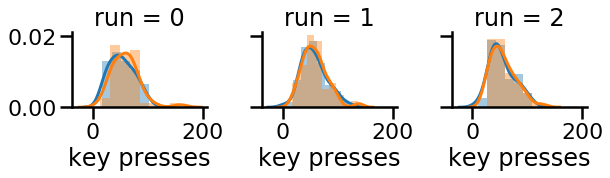

In [88]:
fac = sns.FacetGrid(behavior.groupby(['subject', 'session', 'run']).size().to_frame('key presses').reset_index(), col='run', hue='session')
fac.map(sns.distplot, 'key presses')

In [89]:
behavior['duration'] = behavior.groupby(['subject', 'session', 'run']).apply(lambda d: pd.Series((d['onset'] - d['onset'].shift(1).values).values)).reset_index(drop=True)

In [90]:
behavior['percept'] = behavior['previous_key'].map({'z':'full', 'x':'mixed', 'm':'full'})

/Users/gilles/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


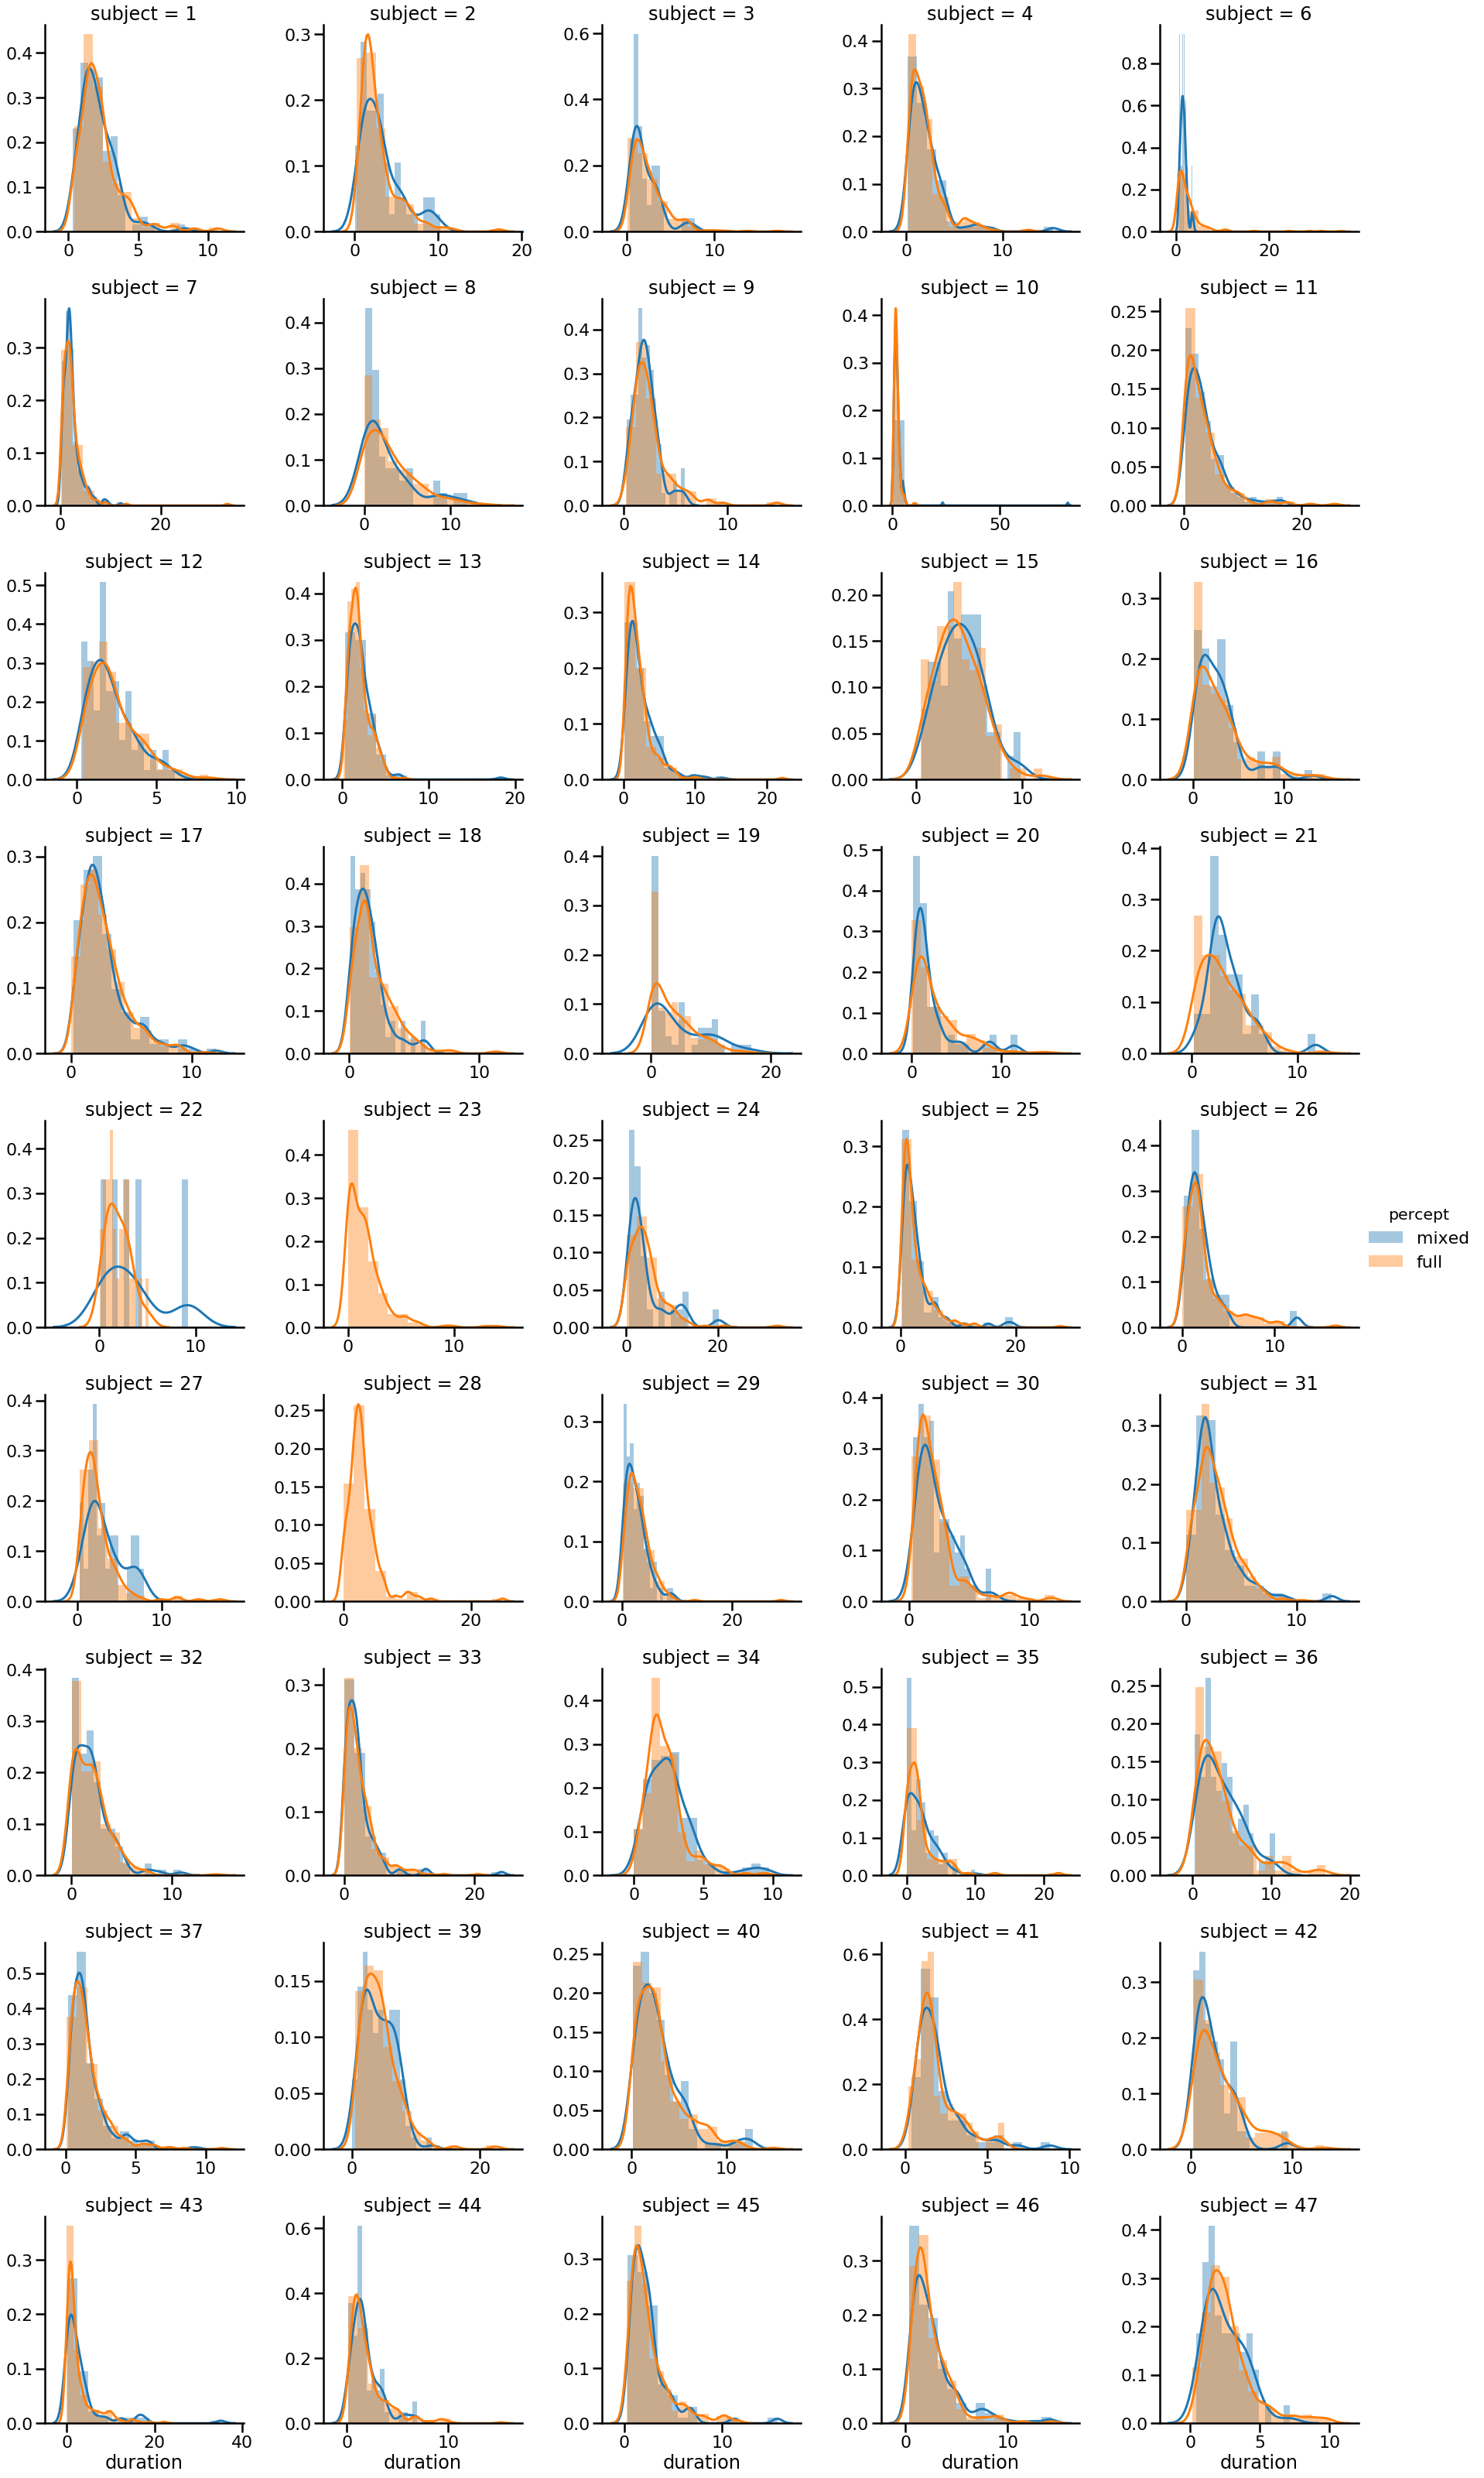

In [91]:
fg = sns.FacetGrid(behavior[~behavior.percept.isnull()], col='subject', hue='percept', col_wrap=5, sharex=False, size=5, sharey=False)
fg.map(sns.distplot, 'duration', bins=15).add_legend()

In [92]:
result = behavior.pivot_table(index='subject', columns=['session', 'percept'], values='duration', aggfunc='median')

In [93]:
result.describe()

session          1                     2           
percept       full      mixed       full      mixed
count    45.000000  41.000000  44.000000  38.000000
mean      2.196825   2.193023   2.013785   1.904347
std       0.849105   0.737535   0.735221   0.844390
min       0.709812   1.076377   0.951612   0.156026
25%       1.653555   1.575682   1.420595   1.372470
50%       2.074251   2.191752   1.891439   1.774247
75%       2.519309   2.620580   2.484402   2.257734
max       4.337474   4.383650   3.837479   4.391270

In [94]:
result.head()

session         1                   2          
percept      full     mixed      full     mixed
subject                                        
1        2.074251  1.981361  1.560115  1.169880
2        2.025656  2.458637  1.988990  2.823496
3        1.294738  1.076377  2.760897  2.347691
4        2.035825  1.895442  1.286629  1.372281
6        1.950289       NaN  1.700238  1.513387

In [95]:
result.to_csv('/Users/gilles/git/br_anaglyph/data/median_durations.tsv', sep='\t')

In [96]:
import matplotlib.pyplot as plt

In [97]:
import scipy as sp

In [103]:
result.corr()

session                 1                   2          
percept              full     mixed      full     mixed
session percept                                        
1       full     1.000000  0.779654  0.112030  0.047405
        mixed    0.779654  1.000000  0.086112  0.145444
2       full     0.112030  0.086112  1.000000  0.882403
        mixed    0.047405  0.145444  0.882403  1.000000

In [102]:
sp.stats.pearsonr(result[~result.isnull().any(1)][1, 'mixed'], result[~result.isnull().any(1)][2, 'mixed'])

(0.1454438735226159, 0.39734117188493945)

In [ ]:
behavior.groupby(['session', ])

In [101]:
sp.stats.pearsonr(result[~result.isnull().any(1)][1, 'full'], result[~result.isnull().any(1)][2, 'full'])

(0.035474683467561705, 0.837258987390158)

In [ ]:
sns.relplot(1, 2, data=result)
plt.plot([0, 5], [0, 5], c='k')

In [ ]:
fac = sns.FacetGrid(result.melt(), hue='percept', col='session')
fac.map(sns.distplot, 'value')